In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [40]:
negDiab = (df['diabetes'] == 0).sum()
posDiab = (df['diabetes'] == 1).sum()

print('Count of Positive Diabetes Tests : ', posDiab)
print('Count of Negative Diabetes Tests : ', negDiab)

Count of Positive Diabetes Tests :  8500
Count of Negative Diabetes Tests :  91500


In [34]:
# Identify feature and target columns
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:, -1].name

# Convert categorical columns to numeric
label_encoder = LabelEncoder()
for column in df[feature_names].select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Handle missing values by replacing them with the mean
imputer = SimpleImputer(strategy='mean')
df[feature_names] = imputer.fit_transform(df[feature_names])

# Scale the features
scaler = StandardScaler()
df[feature_names] = scaler.fit_transform(df[feature_names])

# Convert continuous target to categories (example: using median as threshold)
df[target] = pd.cut(df[target], bins=[-float('inf'), df[target].median(), float('inf')], labels=[0, 1])

# Prepare features and target
data_features = df[feature_names]
data_target = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)

print(f"Length of X_train is: {len(X_train)}")
print(f"Length of X_test is: {len(X_test)}")
print(f"Length of y_train is: {len(y_train)}")
print(f"Length of y_test is: {len(y_test)}")

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=500, solver='lbfgs')  # Increased max_iter to 500

# Fit the model
model.fit(X_train, y_train)

# Make predictions
pred = model.predict(X_test)

Length of X_train is: 70000
Length of X_test is: 30000
Length of y_train is: 70000
Length of y_test is: 30000


**Ex4 Evaluation Metrics**

Plot the accuracy score and comment the results

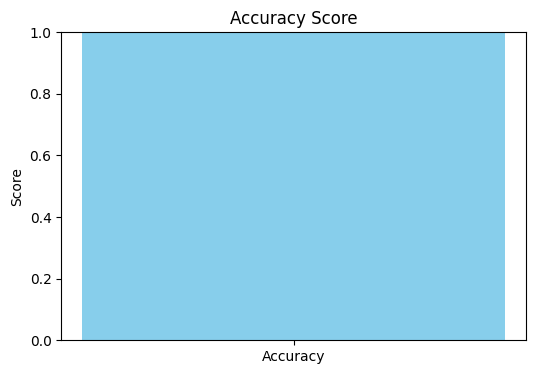

Accuracy Score: 1.00


In [59]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, pred)

# Plot the accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Accuracy Score')
plt.ylabel('Score')
plt.show()

print(f"Accuracy Score: {accuracy:.2f}")

Plot the Recall, precision, F1-score and comment the results

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     27422
     Class 1       1.00      1.00      1.00      2578

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



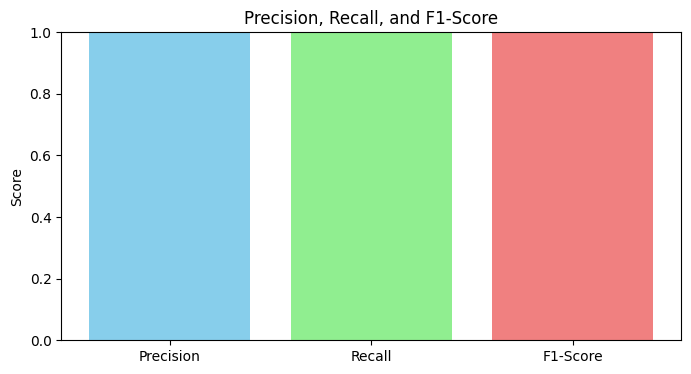

In [64]:
# Generate the classification report
report = classification_report(y_test, pred, target_names=['Class 0', 'Class 1'])

# Calculate individual scores
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

# Print the classification report
print(report)

# Plot precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, f1]

plt.figure(figsize=(8, 4))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.show()


**Ex5 Visualizing the performance of our model**

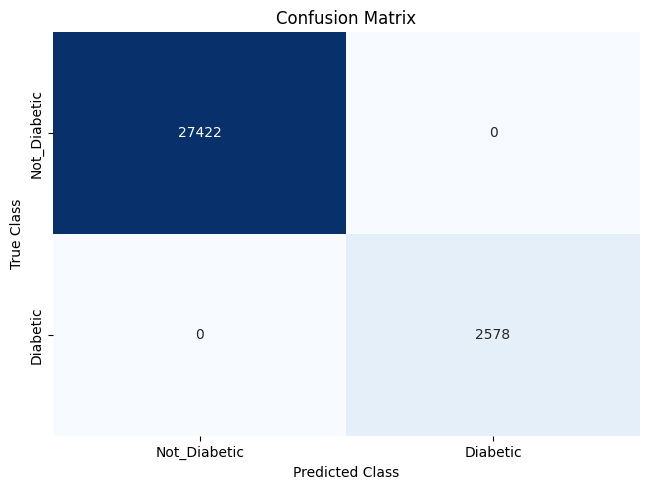

In [50]:
class_names = ['Not_Diabetic', 'Diabetic']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

**Ex6 ROC Curve**

In [79]:
#define the predictor variables and the response variable
X = df[['heart_disease', 'age', 'bmi']]
y = df['diabetes']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

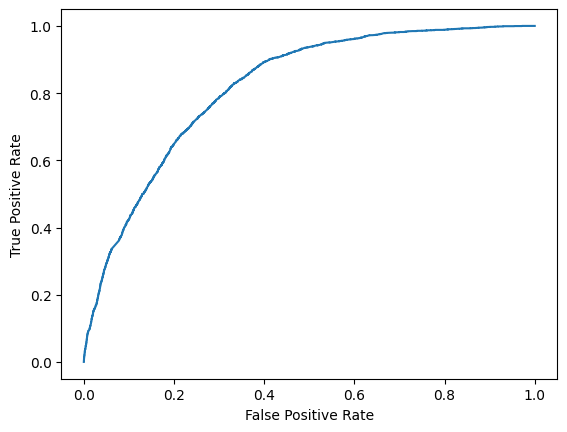

In [81]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()